In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#libraries for decision tree
from sklearn.externals.six import StringIO
from IPython.display import Image   #to view the image of the tree
from sklearn.tree import export_graphviz
import pydotplus
from sklearn import tree
# knn 
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [55]:
import scipy.stats as stats
import pylab

In [56]:
A=pd.read_csv('sample-decision.csv')

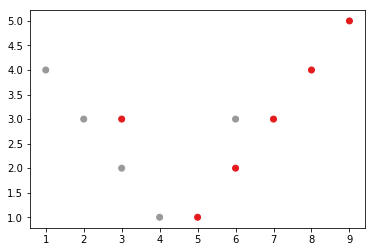

In [57]:
plt.scatter(A['x1'],A['x2'],c=A['class'],cmap='Set1')

In [58]:
!pip install graphviz # to use decision tree

Invalid requirement: '#'
Traceback (most recent call last):
  File "C:\Users\AKSHAY\Anaconda3\lib\site-packages\pip\_vendor\packaging\requirements.py", line 93, in __init__
    req = REQUIREMENT.parseString(requirement_string)
  File "C:\Users\AKSHAY\Anaconda3\lib\site-packages\pip\_vendor\pyparsing.py", line 1632, in parseString
    raise exc
  File "C:\Users\AKSHAY\Anaconda3\lib\site-packages\pip\_vendor\pyparsing.py", line 1622, in parseString
    loc, tokens = self._parse( instring, 0 )
  File "C:\Users\AKSHAY\Anaconda3\lib\site-packages\pip\_vendor\pyparsing.py", line 1379, in _parseNoCache
    loc,tokens = self.parseImpl( instring, preloc, doActions )
  File "C:\Users\AKSHAY\Anaconda3\lib\site-packages\pip\_vendor\pyparsing.py", line 3395, in parseImpl
    loc, exprtokens = e._parse( instring, loc, doActions )
  File "C:\Users\AKSHAY\Anaconda3\lib\site-packages\pip\_vendor\pyparsing.py", line 1379, in _parseNoCache
    loc,tokens = self.parseImpl( instring, preloc, doActions )
  

In [59]:
!pip install pydotplus

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [60]:
# lets draw a tree and give depth as only 1 it is clear from the above figure that just one depth
# will not take care of the outlier

mycols=['x1','x2']

In [61]:
cl_tree=tree.DecisionTreeClassifier(criterion="gini",random_state=1,max_depth=2)
cl_tree=cl_tree.fit(A[['x1','x2']],A['class'])
# the model building is done
# lets first predict on the data
pred = cl_tree.predict(A[['x1','x2']])
# for the confusion matrix 
print (pd.crosstab(A['class'],pred))

col_0  0  1
class      
0      5  1
1      1  4


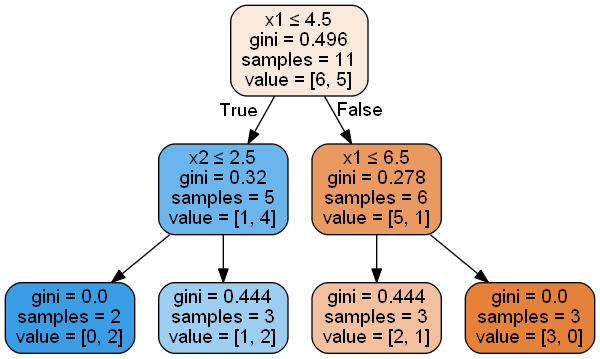

In [62]:
# to view the tree
dot_A = StringIO()
export_graphviz(cl_tree,out_file=dot_A,feature_names=mycols,filled=True, rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_A.getvalue())
Image(graph.create_png())
#graph.write_png('Toy_tree_depth1.png')

In [63]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats 
#import linear regression machine learning library
from sklearn.linear_model import LinearRegression,LogisticRegression
import statsmodels.formula.api as smf
#pckage to split data into train and test
from sklearn.model_selection import train_test_split
# polynomial feature
from sklearn.preprocessing import PolynomialFeatures
# calculating confusion matricss
from sklearn import metrics
#for roc and auc curve
from sklearn.metrics import roc_curve, auc

In [64]:
A=pd.read_csv('prima-indians-diabetes.csv',header=None)
A.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [65]:
A.columns=['preg','glu','bp','sft','ins','bmi','dpf','age','class']
A.head()

,preg,glu,bp,sft,ins,bmi,dpf,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [66]:
A[~A.applymap(np.isreal).all(1)]

,preg,glu,bp,sft,ins,bmi,dpf,age,class


In [67]:
A = A.fillna(A.median())
A

,preg,glu,bp,sft,ins,bmi,dpf,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [68]:
A.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
glu,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
bp,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
sft,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
ins,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
bmi,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
dpf,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [85]:
# copy all the predictor variable in x
x=A[['preg','glu','bp','sft','ins','bmi','dpf','age']]
# copy the class column alone into the y dataframes.This is the dependent variable
y=A['class']

In [70]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=1)

In [71]:
y_test.head()

,class
285,0
101,0
581,0
352,0
726,0


In [72]:
mycols=['preg','glu','bp','sft','ins','bmi','dpf','age']

In [73]:
cl_tree=tree.DecisionTreeClassifier(criterion="gini",random_state=1,max_depth=3)
cl_tree=cl_tree.fit(A[['preg','glu','bp','sft','ins','bmi','dpf','age']],A['class'])
# the model building is done
# lets first predict on the data
pred = cl_tree.predict(A[['preg','glu','bp','sft','ins','bmi','dpf','age']])
# for the confusion matrix 
print (pd.crosstab(A['class'],pred))

col_0    0    1
class          
0      425   75
1       97  171


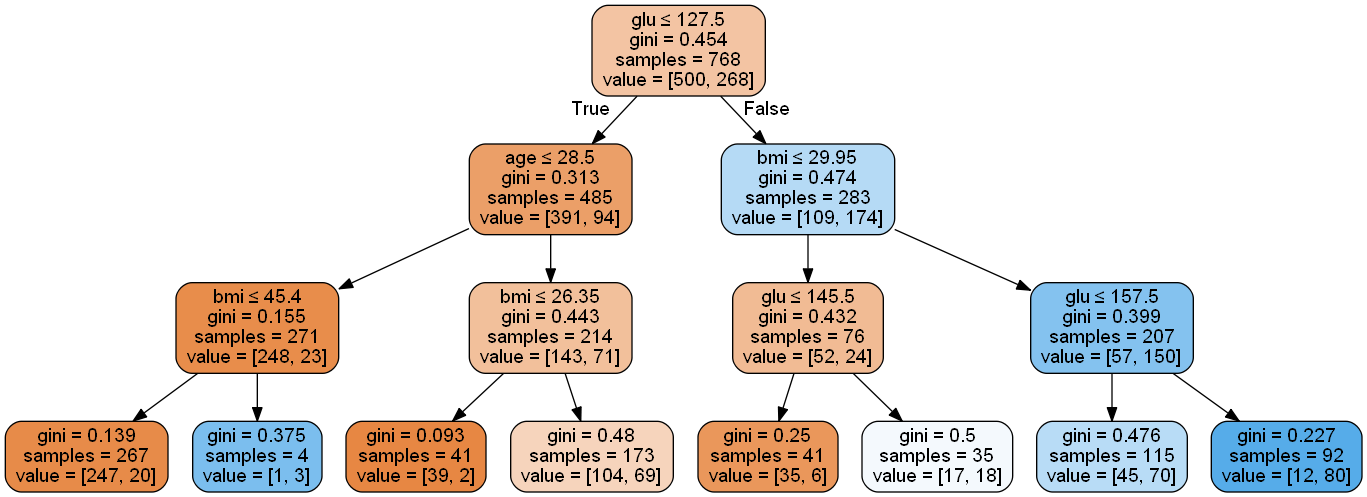

In [74]:
dot_A = StringIO()
export_graphviz(cl_tree,out_file=dot_A,feature_names=mycols,filled=True, rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_A.getvalue())
Image(graph.create_png())

#  KNN 

In [98]:
from sklearn.preprocessing import StandardScaler

In [99]:
B=pd.read_csv('prima-indians-diabetes.csv',header=None)
B.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [100]:
B.columns=['preg','glu','bp','sft','ins','bmi','dpf','age','class']
B.head()

,preg,glu,bp,sft,ins,bmi,dpf,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [89]:
B[~B.applymap(np.isreal).all(1)]

,preg,glu,bp,sft,ins,bmi,dpf,age,class


In [90]:
B = B.fillna(B.median())
B

,preg,glu,bp,sft,ins,bmi,dpf,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [93]:
# copy all the predictor variable in x
X=B[['preg','glu','bp','sft','ins','bmi','dpf','age']]
# copy the class column alone into the y dataframes.This is the dependent variable
Y=B['class']

In [104]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.3,random_state=1)

In [95]:
scaler = StandardScaler()  
scaler.fit(x_train)

x_train = scaler.transform(x_train)  
x_test = scaler.transform(x_test) 

In [102]:
from sklearn.neighbors import KNeighborsClassifier

In [107]:
temp = []

# Calculating error for K values between 1 and 40
for i in range(1,40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(X_test)
    ct = pd.crosstab(Y_test,pred_i)
    ct
    temp.append(((ct.iloc[0,0]+ct.iloc[1,1])/(ct.iloc[0,0]+ct.iloc[0,1]+ct.iloc[1,0]+ct.iloc[1,1])))
    #error.append(np.mean(pred_i != y_test))   

In [109]:
ct

col_0,0,1
class,,
0,137,9
1,48,37


In [108]:
temp

[0.7575757575757576,
 0.7229437229437229,
 0.7359307359307359,
 0.7229437229437229,
 0.7705627705627706,
 0.7575757575757576,
 0.7619047619047619,
 0.7489177489177489,
 0.7489177489177489,
 0.7532467532467533,
 0.7662337662337663,
 0.7705627705627706,
 0.7748917748917749,
 0.7662337662337663,
 0.7878787878787878,
 0.7922077922077922,
 0.7878787878787878,
 0.7705627705627706,
 0.7705627705627706,
 0.7792207792207793,
 0.7792207792207793,
 0.7705627705627706,
 0.7619047619047619,
 0.7619047619047619,
 0.7705627705627706,
 0.7575757575757576,
 0.7705627705627706,
 0.7575757575757576,
 0.7662337662337663,
 0.7835497835497836,
 0.7835497835497836,
 0.7662337662337663,
 0.7705627705627706,
 0.7705627705627706,
 0.7662337662337663,
 0.7705627705627706,
 0.7662337662337663,
 0.7532467532467533,
 0.7532467532467533]

Text(0,0.5,'Mean Error')

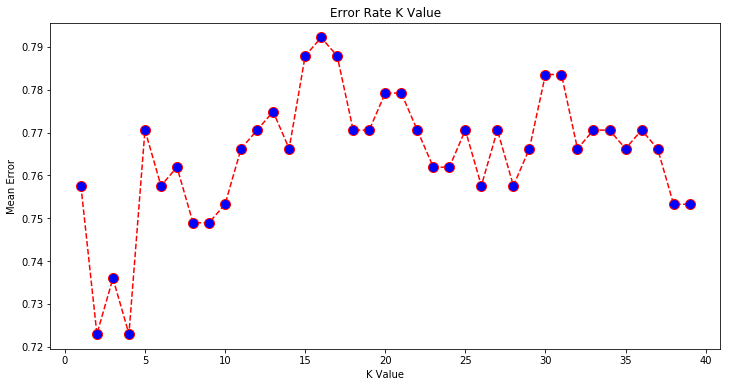

In [112]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), temp, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error') 

In [118]:
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [119]:
y_pred = classifier.predict(X_test)

In [120]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(Y_test, y_pred))  
print(classification_report(Y_test, y_pred))

[[128  18]
 [ 35  50]]
             precision    recall  f1-score   support

          0       0.79      0.88      0.83       146
          1       0.74      0.59      0.65        85

avg / total       0.77      0.77      0.76       231



#  SVM

In [122]:
from sklearn.svm import SVC #support vector classifier
model = SVC(kernel = 'linear',C=1,gamma=2)
model.fit(X_train,Y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=2, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [125]:
print ("train accuracy:", model.score(X_train,Y_train)) #on training data
#check accuracy on test
print ("test accuracy:", model.score(X_train,Y_train))

train accuracy: 0.7802607076350093
test accuracy: 0.7802607076350093


In [128]:
from sklearn.model_selection import GridSearchCV

In [134]:
k= ['linear']
c= range(1,5)
g= np.arange(0.1,1,0.1)
param_grid=dict(kernel=k,C=c,gamma=g)
new_model = SVC()
grid = GridSearchCV(new_model,param_grid,scoring='accuracy')

In [135]:
param_grid

{'kernel': ['linear'],
 'C': range(1, 5),
 'gamma': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])}

In [136]:
grid.fit(X_train,Y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'kernel': ['linear'], 'C': range(1, 5), 'gamma': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)